In [14]:
%matplotlib inline
import datetime as datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.plotting.register_matplotlib_converters()
DATE_AXIS = {'Jan  ': 'Jan', 'Feb  ': 'Feb', 'Mar  ': 'Mar', 'Apr  ': 'Apr', 'May  ': 'May', 'Jun  ': 'Jun',
             'July  ': 'Jul', 'Aug  ': 'Aug', 'Sep  ': 'Sep', 'Oct ': 'Oct', 'Nov': 'Nov', 'Dec': 'Dec'} # є проблема з заданням дати в файлі
FILENAME = 'rnd_contest_data.xlsx'
SHEET_WITH_DATA = 'REF raw data'
SHEET_WITH_BRANDS = 'brand encoding'
ALL_COLUMNS = ['Source', 'Month', 'Year', 'Logic', 'Brand', 'Model', 'CONSTRUCTION', 'NO. OF DOORS', 'FREEZ. POSITION',
               'HEIGHT IN CM ', 'WIDTH IN CM', 'DEPTH IN CM', 'ENERGY LABEL EU', 'NOFROST SYSTEM', 'NET LTRS.',
               'NETFREEZER LTR.', 'NETFRIG. LTRS.', 'FRONT DECORAT.', 'ICE-CUBE DISPEN', 'WATER DISPENSER',
               '0° COOLING',
               'DISPLAY', 'MOUNTING SYSTEM', 'FirstActivity', 'Sales Units', 'Sales Units%', 'SALES THS.UAH',
               'SALES THS.USD', 'SALES THS.EUR', 'Sales Value%', 'D.UNW. SALES', 'D.WGT. SALES', 'PRICE UAH/UN.',
               'PRICE INDEX%', 'PRICE USD/UN.', 'PRICE EUR/UN.', 'TOS VAL', 'Amount', 'SAP  Name', 'REF type',
               'PJT Name', 'Year2', 'Quarter', 'Type segment', 'TTL Segment', 'Address market', 'Month_', 'Height',
               'Half year', 'Price segment USD_TTL', 'Price segment USD_BMF', 'Price segment USD_TMF',
               'Price segment USD_SBS', 'Price segment USD_B-IN']
def give_data(columns=ALL_COLUMNS):  #повертає pandas dataframe
    data = pd.read_excel(FILENAME, sheet_name=SHEET_WITH_DATA)
    data = data[columns] # є можливість вибрати для аналізу не всі колонки
    data['Month'].replace(list(DATE_AXIS.keys()),
                          list(map(lambda x: datetime.datetime.strptime(x + '2018', '%b%Y'), list(DATE_AXIS.values()))),
                          inplace=True)
    data.rename(columns={'Sales Units': 'Quantity', 'PRICE USD/UN.': 'PriceUSD'}, inplace=True)
    data = data[data['Brand'] != '<OT>']
    return data

In [15]:
data = give_data()
data2 = data[data['Source'] == 'Traditional Sales']# поки працюватимемо з традиційними продажами
data2

,Source,Month,Year,Logic,Brand,Model,CONSTRUCTION,NO. OF DOORS,FREEZ. POSITION,HEIGHT IN CM,...,TTL Segment,Address market,Month_,Height,Half year,Price segment USD_TTL,Price segment USD_BMF,Price segment USD_TMF,Price segment USD_SBS,Price segment USD_B-IN
0,Traditional Sales,2018-01-01,2018,Weekly,INDESIT,TIAA 14,FREESTANDING,2.0,FREEZER TOP,145,...,0 < 12000 UAH,<13000,NaN,Other,NaN,0 < 450 USD,0 < 450 USD,0 < 650 USD,0 < 900 USD,0 < 600 USD
1,Traditional Sales,2018-01-01,2018,Weekly,WHIRLPOOL,BSNF 9121 OX,FREESTANDING,2.0,FREEZER BOTTOM,201,...,13000 < 16000 UAH,>13000,NaN,Other,NaN,450 < 500 USD,450 < 500 USD,0 < 650 USD,0 < 900 USD,0 < 600 USD
2,Traditional Sales,2018-01-01,2018,Weekly,LG,GA-B429SECZ,FREESTANDING,2.0,FREEZER BOTTOM,191,...,13000 < 16000 UAH,>13000,NaN,Other,NaN,450 < 500 USD,450 < 500 USD,0 < 650 USD,0 < 900 USD,0 < 600 USD
3,Traditional Sales,2018-01-01,2018,Weekly,SAMSUNG,RB37J5000SA/UA,FREESTANDING,2.0,FREEZER BOTTOM,201,...,16000 < 18000 UAH,>13000,NaN,Other,NaN,500 < 600 USD,500 < 600 USD,0 < 650 USD,0 < 900 USD,0 < 600 USD
4,Traditional Sales,2018-01-01,2018,Weekly,SAMSUNG,RB37J5000EF/UA,FREESTANDING,2.0,FREEZER BOTTOM,201,...,16000 < 18000 UAH,>13000,NaN,Other,NaN,500 < 600 USD,500 < 600 USD,0 < 650 USD,0 < 900 USD,0 < 600 USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20941,Traditional Sales,2018-12-01,2018,Weekly,BEKO,RCNA355K20PT,FREESTANDING,2.0,FREEZER BOTTOM,201,...,12000 < 13000 UAH,<13000,NaN,Other,NaN,450 < 500 USD,450 < 500 USD,0 < 650 USD,0 < 900 USD,0 < 600 USD
20942,Traditional Sales,2018-12-01,2018,Weekly,SAMSUNG,RB33J3305SS/UA,FREESTANDING,2.0,FREEZER BOTTOM,185,...,13000 < 16000 UAH,>13000,NaN,Other,NaN,500 < 600 USD,500 < 600 USD,0 < 650 USD,0 < 900 USD,0 < 600 USD
20943,Traditional Sales,2018-12-01,2018,Weekly,SAMSUNG,RB37J5225EF/UA,FREESTANDING,2.0,FREEZER BOTTOM,201,...,18000 < 20000 UAH,>13000,NaN,Other,NaN,700 < 800 USD,700 < 800 USD,700 < 800 USD,0 < 900 USD,700 < 800 USD
20944,Traditional Sales,2018-12-01,2018,Weekly,WHIRLPOOL,BSNF 9752 OX,FREESTANDING,2.0,FREEZER BOTTOM,201,...,16000 < 18000 UAH,>13000,NaN,Other,NaN,500 < 600 USD,500 < 600 USD,0 < 650 USD,0 < 900 USD,0 < 600 USD


In [21]:
def give_models_tree(data):# повертає словник де ключі - бренди, а значення - списки моделей
    res = {}
    for i in list(data['Brand'].unique()):
        res[i] = list(data[data['Brand'] == i]['Model'].unique())
    return res


In [22]:
def plot_dynamics(data, models=[], title=''):# будує графік продажів по всіх моделях у models
    sns.set()
    d = data[data['Model'].isin(models)]
    fig = sns.relplot(x='Month', y='SALES THS.USD', hue="Model", kind="line",
                      data=d[['Month', 'SALES THS.USD', 'Model']])
    fig.fig.suptitle(title)
    plt.show()

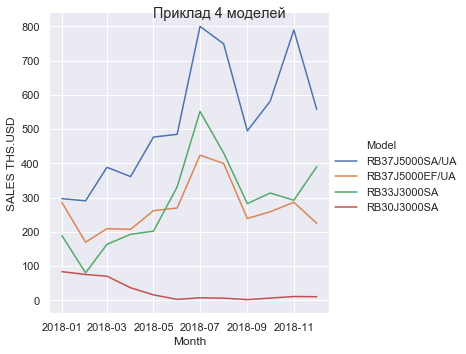

In [23]:
plot_dynamics(data2, ['RB37J5000SA/UA', 'RB37J5000EF/UA', 'RB33J3000SA', 'RB30J3000SA', ], 'Приклад 4 моделей')

In [26]:
def plot_dynamics_brand(data, name, max_p=6, mean_p=2, min_p=1, correct_length_of_sales=9):
    models = data[data['Brand'] == name]['Model'].unique()
    r = []
    for i in range(len(models)):
        if (data[data['Model'] == models[i]]).shape[0] < correct_length_of_sales:
            r += [i]
    models = np.delete(models, r)
    if len(models) > max_p+min_p+mean_p:
        models = sorted(models, key=lambda x: (data[data['Model'] == x])['SALES THS.USD'].mean())
        res = models[:min_p:] + models[len(models) // 2 - mean_p // 2:len(models) // 2 + mean_p // 2 + mean_p % 2:] + models[-max_p::]
        plot_dynamics(data, res, name)
    else:
        plot_dynamics(data, models, name)

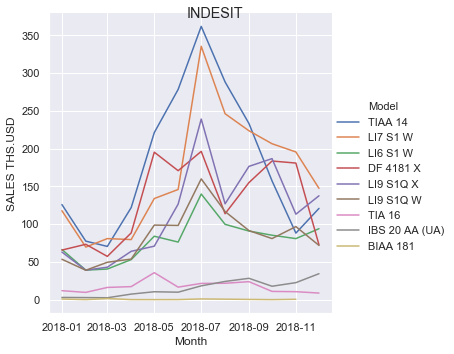

In [27]:
plot_dynamics_brand(data2, 'INDESIT')